# Dian Nissa Zahria/4101422133

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
#pemanggilan data
data = pd.read_csv("Titanic-Dataset.csv")

# Nomor 1

In [112]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [114]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Nomor 1 a (Jumlah Total Penumpang dalam Data)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Jumlah total penumpang dapat dilihat dalam colum PassengerId. Jadi total penumpang dalam data yaitu 891.

# Nomor 1 b (Jumlah Penumpang Selamat dan Tidak Selamat)

In [116]:
total_passengers = data.shape[0]

In [117]:
survival_counts = data['Survived'].value_counts()

In [118]:
# Menampilkan dalam Bentuk Tabel
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': survival_counts.values
})
print("Jumlah Penumpang Selamat dan Tidak Selamat:")
print(survival_table)

Jumlah Penumpang Selamat dan Tidak Selamat:
          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


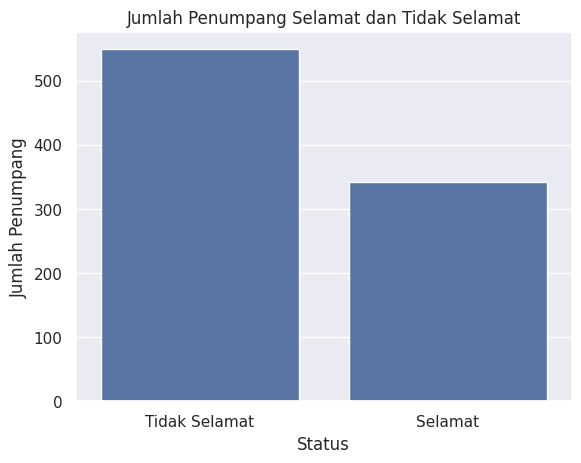

In [119]:
# Visualisasi
sns.barplot(x=survival_table['Status'], y=survival_table['Jumlah'])
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah Penumpang')
plt.show()

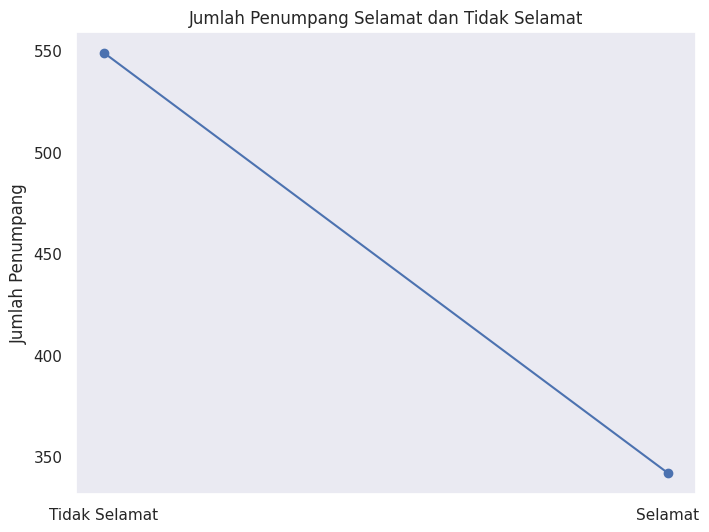

In [120]:
# Visualisasi dengan Grafik Garis
plt.figure(figsize=(8, 6))
plt.plot(survival_table['Status'], survival_table['Jumlah'], marker='o')
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah Penumpang')
plt.grid()
plt.show()

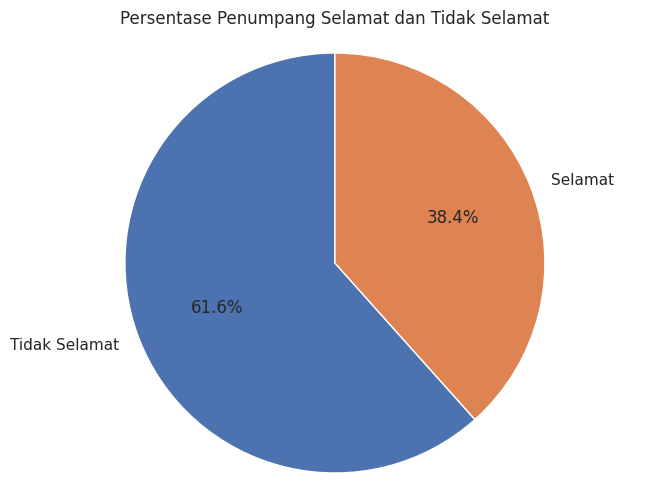

In [121]:
# Visualisasi dengan Diagram Lingkaran
plt.figure(figsize=(8, 6))
plt.pie(survival_table['Jumlah'], labels=survival_table['Status'], autopct='%1.1f%%', startangle=90)
plt.title('Persentase Penumpang Selamat dan Tidak Selamat')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Jadi jumlah penumpang tidak selamat yaitu 549 dan jumlah penumpang selamat yaitu 342. Presentasenya 61,6% penumpang tidak selamat dan 38,4% penumpang selamat.

# Nomor 1 c (Rata-rata Umur Penumpang, Siapa Termuda dan Tertua)

In [122]:
# Rata-rata Umur Penumpang, Penumpang Termuda dan Tertua
average_age = data['Age'].mean()
youngest_passenger = data.loc[data['Age'].idxmin()]
oldest_passenger = data.loc[data['Age'].idxmax()]

In [123]:
# Menampilkan Hasil
print(f'\nRata-rata Umur: {average_age:.2f}')
print(f'Penumpang Termuda: {youngest_passenger["Name"]}, Umur: {youngest_passenger["Age"]}')
print(f'Penumpang Tertua: {oldest_passenger["Name"]}, Umur: {oldest_passenger["Age"]}')


Rata-rata Umur: 29.70
Penumpang Termuda: Thomas, Master. Assad Alexander, Umur: 0.42
Penumpang Tertua: Barkworth, Mr. Algernon Henry Wilson, Umur: 80.0


Jadi rata-rata umur penumpang yaitu 29,7.

Penumpang Termuda berumur 0,42 yaitu Thomas, Master. Assad Alexander.
Penumpang Tertua berumur 80 yaitu Barkworth, Mr. Algernon Henry Wilson.

# Nomor 1 d (Jumlah Penumpang Berdasarkan Jenis Kelamin)

In [124]:
# Jumlah Penumpang Berdasarkan Jenis Kelamin dan Visualisasi
gender_counts = data['Sex'].value_counts()

In [125]:
# Menampilkan dalam Bentuk Tabel
gender_table = pd.DataFrame({
    'Jenis Kelamin': gender_counts.index,
    'Jumlah': gender_counts.values
})
print("\nJumlah Penumpang Berdasarkan Jenis Kelamin:")
print(gender_table)


Jumlah Penumpang Berdasarkan Jenis Kelamin:
  Jenis Kelamin  Jumlah
0          male     577
1        female     314


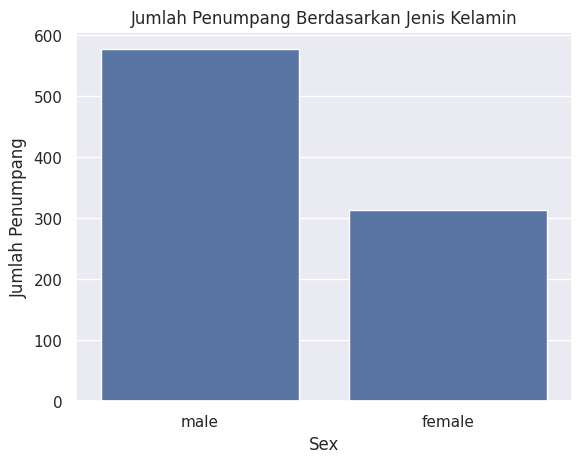

In [126]:
# Visualisasi
sns.countplot(data, x='Sex')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()

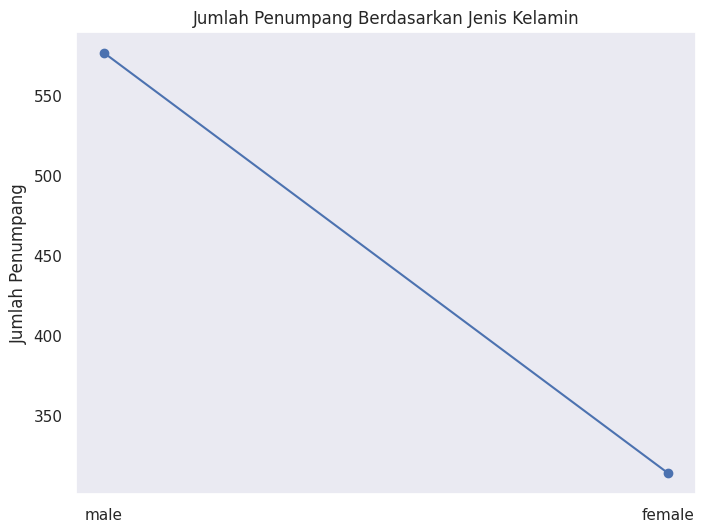

In [127]:
# Visualisasi dengan Grafik Garis
plt.figure(figsize=(8, 6))
plt.plot(gender_counts.index, gender_counts.values, marker='o')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.grid()
plt.show()

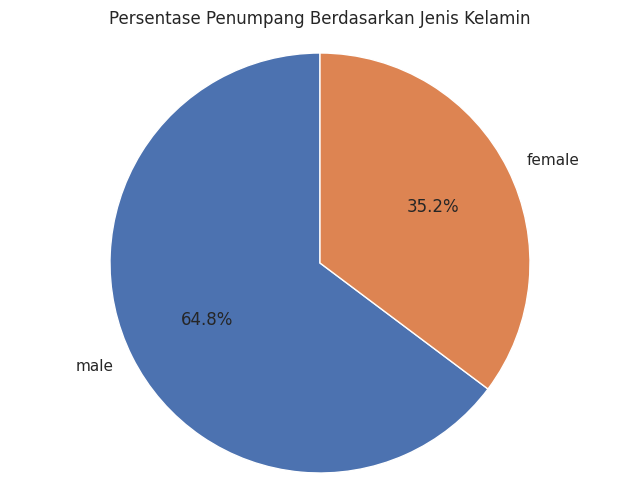

In [128]:
# Visualisasi dengan Diagram Lingkaran
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Penumpang Berdasarkan Jenis Kelamin')
plt.axis('equal')
plt.show()

Jumlah penumpang laki-laki yaitu 577 dan jumlah penumpang perempuan yaitu 314. Jadi penumpang dalam data lebih banyak laki-laki, dengan presentase laki-laki 64,8% dan perempuan 35,2%

# Nomor 1 e (Jumlah Penumpang Berdasarkan Kelas dan Persen Total Data di Kelas 1)

In [129]:
# Menghitung Jumlah Penumpang Berdasarkan Kelas
class_counts = data['Pclass'].value_counts()

In [130]:
# Menghitung Persentase Penumpang di Kelas 1
total_passengers = data.shape[0]
class_1_percentage = (class_counts[1] / total_passengers) * 100

In [131]:
# Menampilkan dalam Bentuk Tabel
class_table = pd.DataFrame({
    'Kelas': class_counts.index,
    'Jumlah': class_counts.values
})
print("\nJumlah Penumpang Berdasarkan Kelas:")
print(class_table)
print(f'Persentase Penumpang di Kelas 1: {class_1_percentage:.2f}%')


Jumlah Penumpang Berdasarkan Kelas:
   Kelas  Jumlah
0      3     491
1      1     216
2      2     184
Persentase Penumpang di Kelas 1: 24.24%


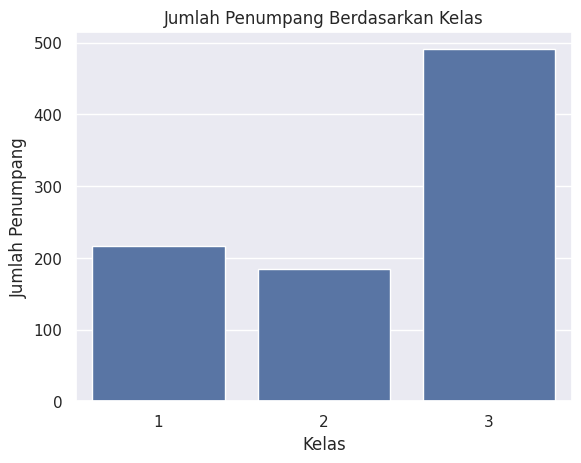

In [132]:
# Visualisasi
sns.barplot(data=class_table, x='Kelas', y='Jumlah')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.ylabel('Jumlah Penumpang')
plt.show()

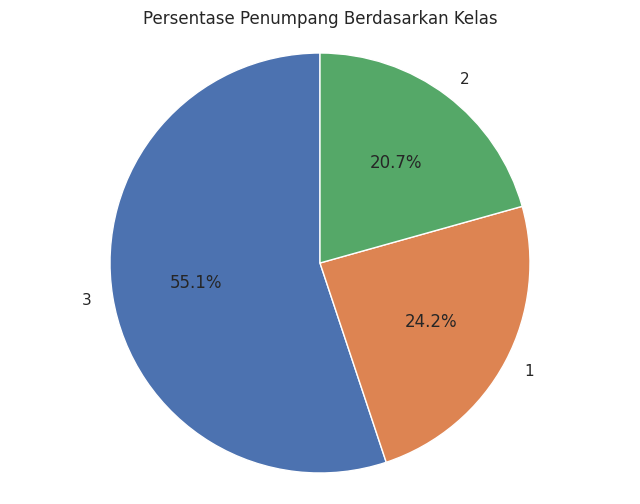

In [133]:
# Visualisasi dengan Diagram Lingkaran
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Penumpang Berdasarkan Kelas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Jumlah penumpang Kelas 1 yaitu 216, Kelas 2 yaitu 184, dan Kelas 3 yaitu 491.Dengan persentase penumpang di Kelas 1 yaitu 24,2%.

# Nomor 2

In [134]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [135]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [136]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

# Nomor 2 a (Cek Missing Value)

Pada data ternyata terdapat missing value. Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values adalah kolom age, cabin, dan embarked dengan uraian sebagai berikut.

Age: 177 nilai yang hilang

Cabin: 687 nilai yang hilang

Embarked: 2 nilai yang hilang

# Nomor 2 b (Mengatasi Missing Value)

Ada beberapa pendekatan yang dapat diambil jika terdapat missing values:
1.   Menghapus Baris. Jika jumlah missing values relatif kecil, dapat menghapus baris tersebut.
2.   Mengisi Missing Values. Dapat mengisi missing values dengan nilai rata-rata, median, modus, atau nilai lain yang relevan.
3. Menggunakan Model. Dalam beberapa kasus, dapat menggunakan model prediktif untuk memperkirakan nilai yang hilang.

Setelah memeriksa,cara mengisi missing values untuk setiap kolom:
*   Age: Dapat diisi dengan median atau rata-rata umur penumpang.
*   Cabin: Dapat diisi dengan nilai 'Unknown' atau dihapus jika terlalu banyak missing values.
*   Embarked: Dapat diisi dengan modus (nilai yang paling sering muncul) dari kolom tersebut.

In [137]:
# Mengisi missing values pada kolom 'Age' dengan median
data['Age'].fillna(data['Age'].median(), inplace=True)


<ipython-input-137-b7f9e774cb20>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [138]:
#melihat ulang jumlah missing value pada kolom Age
np.sum(data['Age'].isnull())

np.int64(0)

In [139]:
# Mengisi missing values pada kolom 'Cabin' dengan 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-139-b09f2d6abdf3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('Unknown', inplace=True)


In [140]:
#melihat ulang jumlah missing value pada kolom Cabin
np.sum(data['Cabin'].isnull())

np.int64(0)

In [141]:
# Mengisi missing values pada kolom 'Embarked' dengan modus
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-141-fec92ced22bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [142]:
#melihat ulang jumlah missing value pada kolom Embarked
np.sum(data['Embarked'].isnull())

np.int64(0)

In [143]:
#mengecek ulang informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dari output diatas diperoleh bahwa sudah tidak ada kolom yang missing value.

# Nomor 2 c (Apakah Terdapat Outlier)

In [144]:
# Memeriksa kolom numerik dalam dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

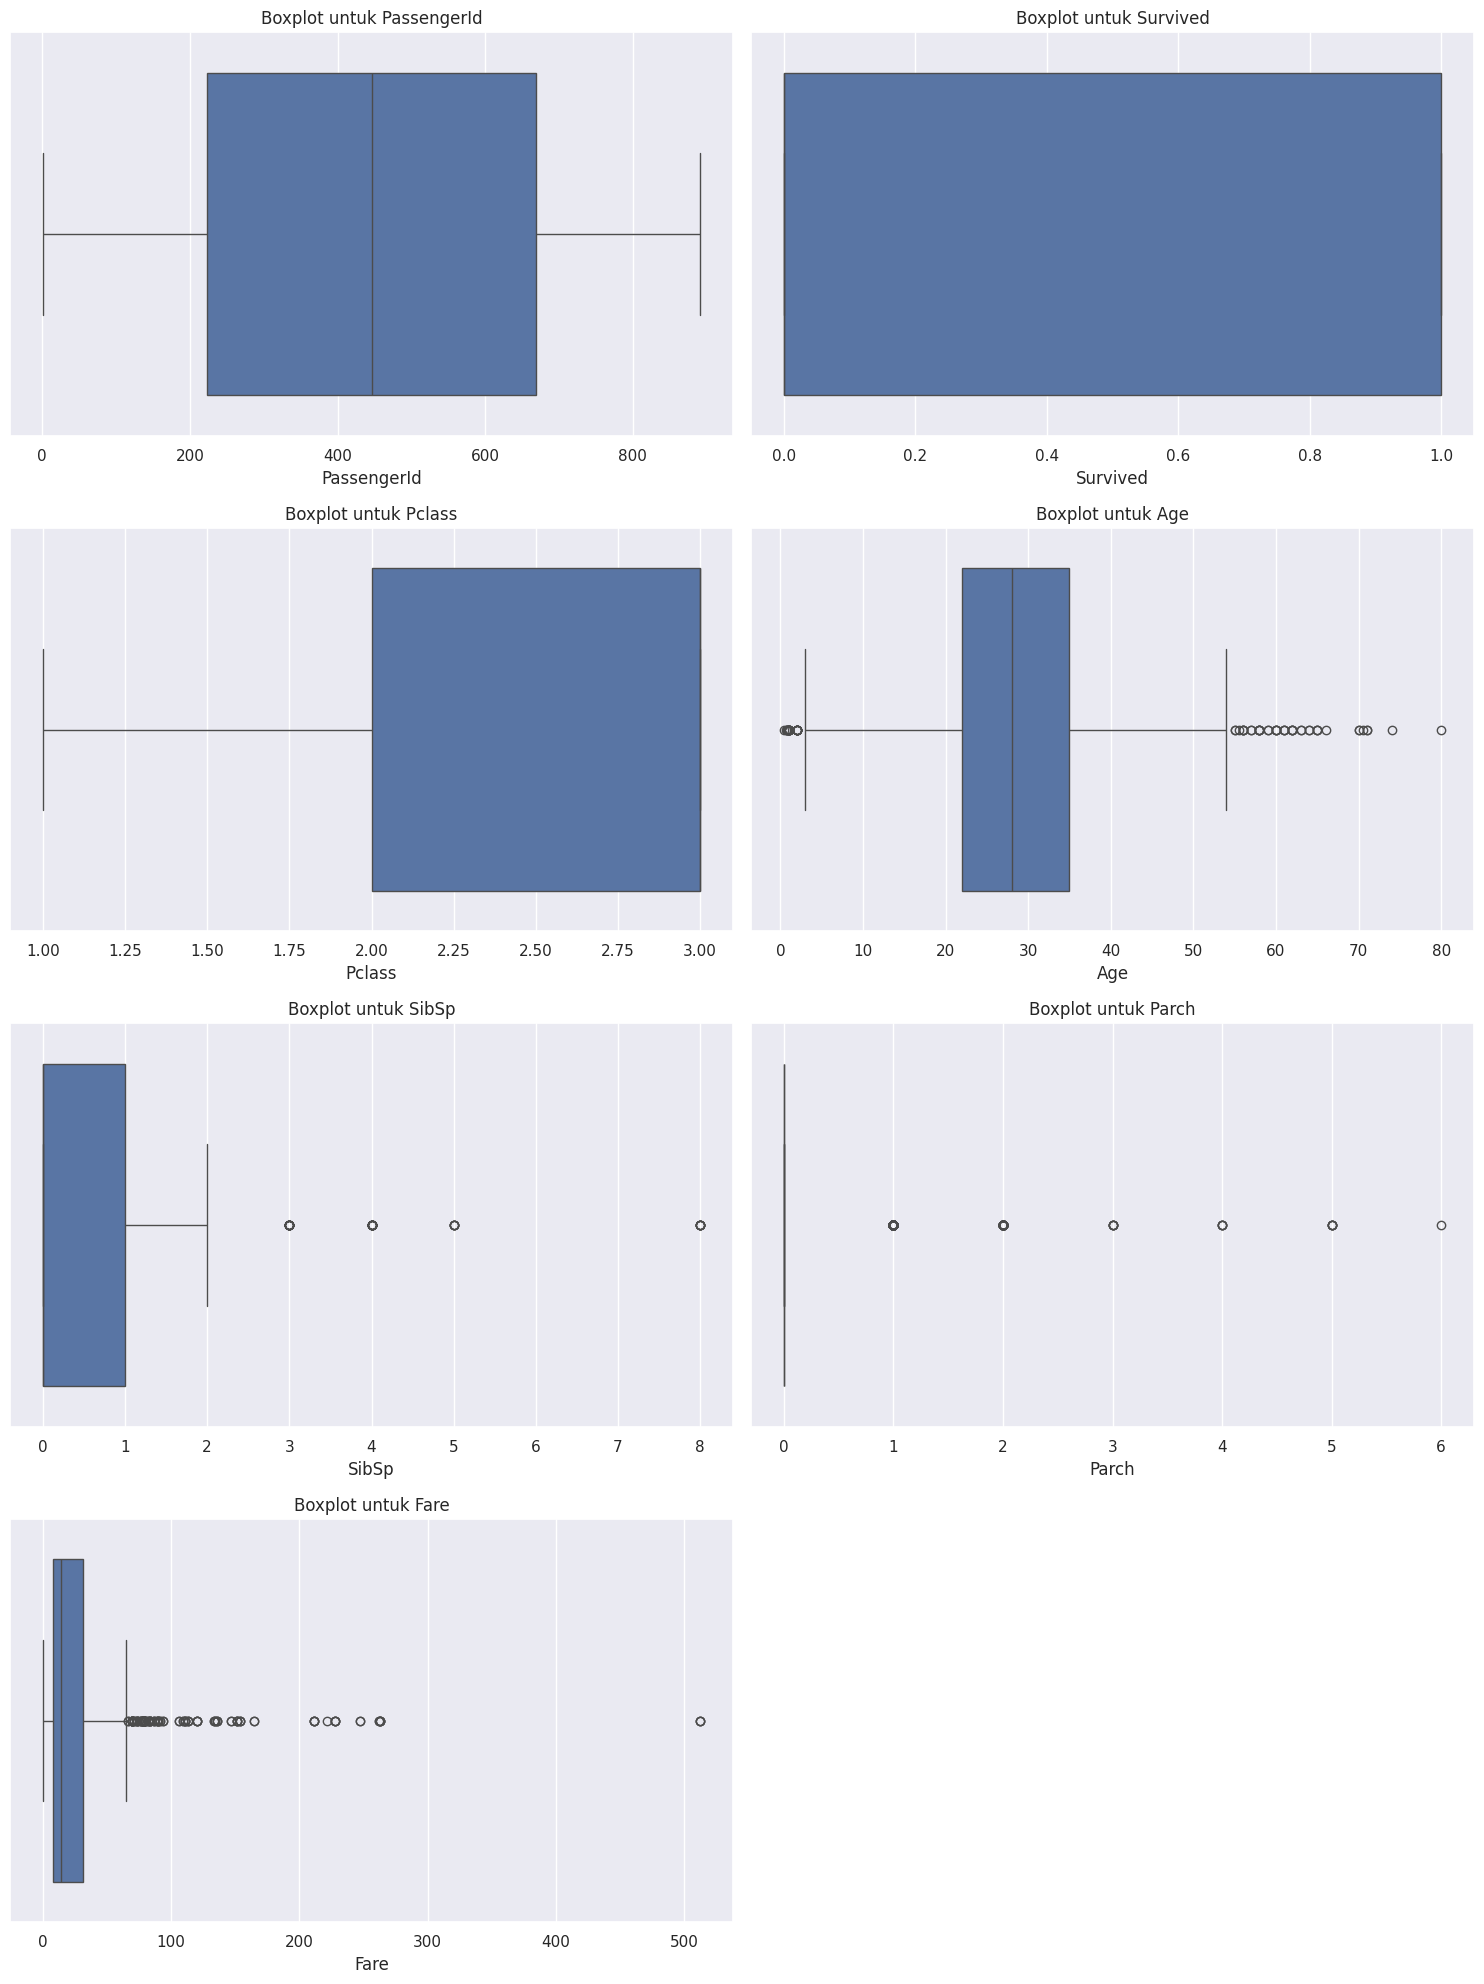

In [145]:
# Visualisasi Boxplot untuk semua kolom numerik
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i + 1)  # Use num_rows in subplot
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot untuk {column}')

plt.tight_layout()
plt.show()

In [146]:
# Menghitung IQR untuk 'Age'
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

In [147]:
# Menghitung IQR untuk 'Fare'
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

In [148]:
# Menampilkan batas untuk outlier
print(f"Batas bawah untuk outlier 'Age': {lower_bound_age}")
print(f"Batas atas untuk outlier 'Age': {upper_bound_age}")
print(f"Batas bawah untuk outlier 'Fare': {lower_bound_fare}")
print(f"Batas atas untuk outlier 'Fare': {upper_bound_fare}")

Batas bawah untuk outlier 'Age': 2.5
Batas atas untuk outlier 'Age': 54.5
Batas bawah untuk outlier 'Fare': -26.724
Batas atas untuk outlier 'Fare': 65.6344


In [149]:
# Mengidentifikasi outlier
outliers_age = data[(data['Age'] < lower_bound_age) | (data['Age'] > upper_bound_age)]
outliers_fare = data[(data['Fare'] < lower_bound_fare) | (data['Fare'] > upper_bound_fare)]

print(f"\nJumlah outlier pada 'Age': {outliers_age.shape[0]}")
print(f"Jumlah outlier pada 'Fare': {outliers_fare.shape[0]}")


Jumlah outlier pada 'Age': 66
Jumlah outlier pada 'Fare': 116


Jadi terdapat outlier pada Age sebanyak 66 dan pada Fare sebanyak 116.

# Nomor 2 d (Cara Mengatasi Outlier)

Outlier dapat diatasi dengan membatasi nilai outlier dengan menggantinya dengan nilai persentil tertentu (metode winsorizing).

In [150]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Tangani missing value dulu
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# PILIH KOLOM NUMERIK YANG MAU DISTANDARISASI
fitur = data[['Age', 'Fare']]

# 1. StandardScaler
scaler_standard = StandardScaler()
fitur_standard = scaler_standard.fit_transform(fitur)

# 2. MinMaxScaler
scaler_minmax = MinMaxScaler()
fitur_minmax = scaler_minmax.fit_transform(fitur)

# 3. RobustScaler
scaler_robust = RobustScaler()
fitur_robust = scaler_robust.fit_transform(fitur)

# Masukkan kembali ke DataFrame untuk lihat hasil
data_standard = pd.DataFrame(fitur_standard, columns=['Age_scaled', 'Fare_scaled'])
data_minmax = pd.DataFrame(fitur_minmax, columns=['Age_scaled', 'Fare_scaled'])
data_robust = pd.DataFrame(fitur_robust, columns=['Age_scaled', 'Fare_scaled'])

print("Contoh hasil StandardScaler:")
print(data_standard.head())

print("\nContoh hasil MinMaxScaler:")
print(data_minmax.head())

Contoh hasil StandardScaler:
   Age_scaled  Fare_scaled
0   -0.565736    -0.502445
1    0.663861     0.786845
2   -0.258337    -0.488854
3    0.433312     0.420730
4    0.433312    -0.486337

Contoh hasil MinMaxScaler:
   Age_scaled  Fare_scaled
0    0.271174     0.014151
1    0.472229     0.139136
2    0.321438     0.015469
3    0.434531     0.103644
4    0.434531     0.015713


<ipython-input-150-6a2530bde350>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-150-6a2530bde350>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Memeriksa Hasil Setelah Mengatasi Outlier
Setelah mengatasi outlier, dapat memeriksa statistik deskriptif untuk melihat perubahan.

In [151]:
# Menampilkan statistik deskriptif setelah mengatasi outlier
print("\nStatistik Deskriptif setelah Mengatasi Outlier:")
print(data[['Age', 'Fare']].describe())


Statistik Deskriptif setelah Mengatasi Outlier:
              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


# Nomor 3

# Nomor 3 a (Proses Pembagian Data Training dan Testing)

Pembagian data menjadi data training (pelatihan) dan data testing (pengujian) adalah langkah penting dalam proses pengembangan model machine learning. Proses ini bertujuan untuk memastikan bahwa model yang dibangun dapat generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya.


*   Data Training: Digunakan untuk melatih model. Model belajar dari data ini dengan mencari pola dan hubungan antara fitur (variabel input) dan target (variabel output).
*   Data Testing: Digunakan untuk menguji kinerja model setelah dilatih. Data ini tidak digunakan selama proses pelatihan, sehingga dapat memberikan gambaran yang lebih akurat tentang seberapa baik model dapat bekerja pada data baru.

Proses pembagian data biasanya dilakukan dengan langkah-langkah berikut:
1.   Mengumpulkan Data. Kumpulkan dataset yang akan digunakan untuk pelatihan dan pengujian model.
2.   Menentukan Proporsi Pembagian. Menentukan proporsi pembagian antara data training dan data testing. Umumnya, pembagian yang digunakan adalah
70% - 80% untuk data training dan
20% - 30% untuk data testing

3. Pembagian Data. Pembagian data dapat dilakukan secara acak untuk memastikan bahwa data training dan testing memiliki distribusi yang serupa. Ini penting untuk menghindari bias dalam model.



# Nomor 3 b (Proporsi Pembagian Data)

Proporsi Pembagian Data

Data Training: 80%

Data Testing: 20%

Keseimbangan antara Pelatihan dan Pengujian
*   Dengan menggunakan 80% data untuk pelatihan, model memiliki cukup banyak data untuk belajar dan menemukan pola yang relevan. Ini membantu model untuk generalisasi dengan baik.
*   Menggunakan 20% untuk pengujian memberikan cukup data untuk mengevaluasi kinerja model tanpa mengurangi jumlah data yang digunakan untuk pelatihan secara signifikan.

Ukuran Dataset

*   Dataset Titanic memiliki 891 penumpang. Dengan proporsi 80/20, akan mendapatkan sekitar 712 data untuk pelatihan dan 179 data untuk pengujian. Ini adalah jumlah yang cukup untuk melakukan pelatihan yang efektif dan juga untuk menguji model.
*   Jika proporsi untuk data testing terlalu kecil, hasil evaluasi model mungkin tidak representatif, sedangkan jika terlalu besar, model mungkin tidak memiliki cukup data untuk belajar.

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [153]:
# Memisahkan fitur dan target
X = data.drop('Survived', axis=1)  # Fitur (semua kolom kecuali 'Survived')
y = data['Survived']                # Target (kolom 'Survived')

In [154]:
# Membagi data menjadi data training dan data testing dengan proporsi 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 712
Jumlah data testing: 179


# Nomor 3 c (Model Klasifikasi dari 3 Algoritma)

Model K-Nearest Neighbors (KNN)

KNN adalah algoritma klasifikasi yang sederhana dan intuitif. Algoritma ini bekerja dengan cara mencari 'K' tetangga terdekat dari data yang ingin diklasifikasikan dan memberikan label berdasarkan mayoritas label dari tetangga tersebut. KNN tidak memerlukan pelatihan model secara eksplisit, karena semua data pelatihan disimpan dan digunakan saat melakukan prediksi.

Cara Kerja:
1.   Hitung jarak antara data yang ingin diprediksi dengan semua data pelatihan menggunakan metrik jarak (misalnya, Euclidean).
2.  Temukan 'K' tetangga terdekat.
3. Tentukan kelas berdasarkan mayoritas kelas dari 'K' tetangga.

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming 'data' is your DataFrame

# 1. Drop irrelevant columns (e.g., 'PassengerId', 'Name', 'Ticket')
X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

# 2. Handle categorical features using Label Encoding or One-Hot Encoding
# Label Encoding for 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
X['Sex_encoded'] = label_encoder.fit_transform(X['Sex'])
X['Embarked_encoded'] = label_encoder.fit_transform(X['Embarked'])

# One-Hot Encoding for 'Cabin' and 'Pclass'
X = pd.get_dummies(X, columns=['Cabin', 'Pclass'], prefix=['Cabin', 'Pclass'])

# Drop original categorical columns
X = X.drop(['Sex', 'Embarked'], axis=1)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn:.2f}")

Akurasi KNN: 0.70


Decision Tree

Decision Tree adalah algoritma klasifikasi yang menggunakan struktur pohon untuk membuat keputusan. Setiap node dalam pohon mewakili fitur, setiap cabang mewakili keputusan, dan setiap daun mewakili kelas hasil.
Decision Tree mudah dipahami dan diinterpretasikan, serta dapat menangani data numerik dan kategorikal.

Cara Kerja:

1.   Algoritma membagi dataset menjadi subset berdasarkan fitur yang memberikan informasi terbaik (misalnya, menggunakan Gini impurity atau entropy).
2.   Proses ini diulang secara rekursif hingga mencapai kriteria berhenti (misalnya, kedalaman maksimum pohon atau jumlah minimum sampel di daun).

In [157]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Melatih model

# Melakukan prediksi
y_pred_dt = dt.predict(X_test)

# Menghitung akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")

Akurasi Decision Tree: 0.78


Naive Bayes

Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang menggunakan Teorema Bayes. Algoritma ini mengasumsikan bahwa fitur-fitur bersifat independen satu sama lain (naive). Naive Bayes sangat efisien dan sering digunakan untuk klasifikasi teks, seperti spam detection.

Cara Kerja:

1.   Menghitung probabilitas posterior untuk setiap kelas berdasarkan fitur yang ada.
2.   Menggunakan rumus Teorema Bayes untuk menghitung probabilitas kelas dan memilih kelas dengan probabilitas tertinggi.

In [158]:
from sklearn.naive_bayes import GaussianNB

# Membuat model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)  # Melatih model

# Melakukan prediksi
y_pred_nb = nb.predict(X_test)

# Menghitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")

Akurasi Naive Bayes: 0.63


# Nomor 3 d (Evaluasi Masing-Masing Model)

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming 'data' is your DataFrame

# 1. Drop irrelevant columns (e.g., 'PassengerId', 'Name', 'Ticket')
X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

# 2. Handle categorical features using Label Encoding or One-Hot Encoding
# Label Encoding for 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
X['Sex_encoded'] = label_encoder.fit_transform(X['Sex'])
X['Embarked_encoded'] = label_encoder.fit_transform(X['Embarked'])

# One-Hot Encoding for 'Cabin' and 'Pclass'
X = pd.get_dummies(X, columns=['Cabin', 'Pclass'], prefix=['Cabin', 'Pclass'])

# Drop original categorical columns
X = X.drop(['Sex', 'Embarked'], axis=1)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Predict and evaluate for KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn:.2f}")

# 6. Create and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Melatih model

# 7. Predict and evaluate for Decision Tree
y_pred_tree = dt.predict(X_test) # Defining y_pred_tree here
accuracy_dt = accuracy_score(y_test, y_pred_tree)
print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")

# 8. Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)  # Melatih model

# 9. Predict and evaluate for Naive Bayes
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")

#10. Evaluation metrics
print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))

print("=== DecisionTreeClassifier ===")
print(classification_report(y_test, y_pred_tree))

print("=== GaussianNB ===")
print(classification_report(y_test, y_pred_nb)) # Using y_pred_nb here

# akurasi knn
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn * 100:.2f}%")
# akurasi Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Akurasi Decision Tree: {accuracy_tree * 100:.2f}%")
# akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb) # Using y_pred_nb, accuracy_nb here
print(f"Akurasi GaussianNB: {accuracy_nb * 100:.2f}%")

Akurasi KNN: 0.70
Akurasi Decision Tree: 0.78
Akurasi Naive Bayes: 0.63
=== KNN ===
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       105
           1       0.67      0.53      0.59        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.68       179
weighted avg       0.69      0.70      0.69       179

=== DecisionTreeClassifier ===
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

=== GaussianNB ===
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       105
           1       0.82      0.12      0.21        74

    accuracy                           0.63     

KNN:

1.   Akurasi 69,83% menunjukkan bahwa model KNN benar dalam 69,83% dari semua prediksi.
2.   Precision untuk kelas 0 (tidak selamat) yaitu 71% dan untuk kelas 1 (selamat) yaitu 67%. Ini berarti dari semua prediksi bahwa seseorang tidak selamat, 71% benar-benar tidak selamat, dan dari semua prediksi bahwa seseorang selamat, 67% benar-benar selamat.
3. Recall untuk kelas 0 yaitu 82% dan untuk kelas 1 yaitu 53%. Ini menunjukkan bahwa model KNN berhasil menemukan 82% dari semua yang tidak selamat, tetapi hanya 53% dari yang selamat.
4. F1-score untuk kelas 0 yaitu 76% dan untuk kelas 1 yaitu 59%. Ini menunjukkan keseimbangan antara precision dan recall.

Decision Tree:


1.   Akurasi 78,21% menunjukkan bahwa model Decision Tree benar dalam 78,21% dari semua prediksi.
2.   Precision dan recall menunjukkan bahwa model ini lebih baik dalam mengidentifikasi kelas 0 dibandingkan kelas 1, tetapi masih memiliki kinerja yang baik secara keseluruhan.
3. Recall untuk kelas 0 yaitu 79% dan untuk kelas 1 yaitu 77%. Ini menunjukkan bahwa model ini berhasil menemukan 79% dari semua yang tidak selamat, tetapi hanya 77% dari yang selamat.
4. F1-score untuk kelas 0 yaitu 81% dan untuk kelas 1 yaitu 75%.





Naive Bayes:


1.   Akurasi 62,57% menunjukkan bahwa model Naive Bayes benar dalam 62,57% dari semua prediksi.
2.   Precision untuk kelas 0 yaitu 61% dan untuk kelas 1 yaitu 82%. Ini menunjukkan bahwa model ini lebih baik dalam memprediksi kelas 1, tetapi recall untuk kelas 1 sangat rendah (12%), yang menunjukkan bahwa banyak kasus positif yang tidak terdeteksi.
3. Naive Bayes memiliki recall yang sangat tinggi untuk kelas 0, tetapi sangat rendah untuk kelas 1, yang menunjukkan bahwa model ini cenderung mengklasifikasikan banyak kasus kelas 1 sebagai kelas 0.
4. F1-score untuk kelas 1 pada Naive Bayes juga rendah, menunjukkan bahwa model ini tidak seimbang dalam memprediksi kelas-kelas tersebut.





# Nomor 3 e (Perbandingan Paling Bagus)

**Decision Tree** adalah model yang paling baik di antara ketiga model tersebut berdasarkan akurasi, recall, dan f1-score dengan akurasi 78,21%.



*   Decision Tree dapat menangkap interaksi non-linear antara fitur. Ini berarti bahwa model dapat membuat keputusan yang lebih kompleks berdasarkan kombinasi fitur yang berbeda, yang sering kali terjadi dalam dataset yang nyata.
*   Decision Tree menghasilkan model yang mudah dipahami dan diinterpretasikan. Struktur pohon memungkinkan pengguna untuk melihat bagaimana keputusan dibuat, yang dapat membantu dalam analisis dan pemahaman data.

*   Decision Tree dapat menangani baik data kategorikal maupun numerik tanpa memerlukan transformasi tambahan. Ini membuatnya fleksibel untuk berbagai jenis data.
*   Dengan pengaturan parameter seperti kedalaman maksimum pohon, Decision Tree dapat diatur untuk menghindari overfitting, yang sering menjadi masalah dalam model yang lebih kompleks.
*   Meskipun Naive Bayes menunjukkan recall yang tinggi untuk kelas 0, Decision Tree memiliki recall yang lebih seimbang untuk kedua kelas, yang menunjukkan bahwa model ini lebih baik dalam menangani dataset yang tidak seimbang.









# Nomor 4

# Nomor 4 a (Nilai Precision dan Reccal untuk Prediksi Penumpang yang Selamat)

In [163]:
from sklearn.metrics import classification_report

# Menghitung classification report untuk model Decision Tree
report = classification_report(y_test, y_pred_dt, output_dict=True)

# Mengambil precision dan recall untuk kelas 1 (selamat)
precision_survived = report['1']['precision']
recall_survived = report['1']['recall']

# Menampilkan hasil
print(f"Precision untuk penumpang yang selamat: {precision_survived:.2f}")
print(f"Recall untuk penumpang yang selamat: {recall_survived:.2f}")

Precision untuk penumpang yang selamat: 0.72
Recall untuk penumpang yang selamat: 0.77


Dari semua yang diprediksi selamat, 72% benar-benar selamat.

Dari semua penumpang yang benar-benar selamat, model menangkap 77%.

# Nomor 4 b (Banyak Penumpang yang Diprediksi Selamat dan Benar-Benar Selamat)

In [164]:
# Menghitung jumlah penumpang yang diprediksi selamat
predicted_positive = (y_pred_dt == 1).sum()  # Menghitung jumlah prediksi kelas 1
# Menghitung jumlah penumpang yang benar-benar selamat
actual_positive = (y_test == 1).sum()  # Menghitung jumlah aktual kelas 1

print(f"Jumlah penumpang yang diprediksi selamat: {predicted_positive}")
print(f"Jumlah penumpang yang benar-benar selamat: {actual_positive}")

Jumlah penumpang yang diprediksi selamat: 79
Jumlah penumpang yang benar-benar selamat: 74
